In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Доверительный интервал

# Параметрические тесты

## Одновыборочные тесты
Одновыборочные - сравниваем с известным параметром
* __Например:__ Проверям, что монета честная с вероятность $p_0 = 0.5$  

### Сравнение долей : биномиальный критерий

* Выборка : $X_1, .. X_N ~ Ber(p)$
* $H_0 : p = p_0$ Есть Нулевая гипотеза, что вероятность из нашего Распредления Бернули ровна НЕКОТОРОЙ КОНСТАНТЕ
* $H_1 : p != p_0$ Альтернативная гипотеза, что вероятность из нашего Распредления Бернули НЕ РОВНА некоторой константе
* Статистика $T_N$       - количество раз успеха
$T_N = \sum_{i=1}^{N}X_i$
* Нулевое распределение : $T_N ~ Bin (N, p_0)$

In [ ]:
from scipy.stats import binom_test


N_pos = 37 # кол-во УСПЕХА
N = 100 # размер выборки

answer = binom_test(x = N_pos, n = N , p=0.5, alternative='two-sided')

print(f'Значене p-value : {round(answer, 3)}')

#  alternative='two-sided'  -  двусторонняя гипотеза

* $p-value < 0.05$  

* Mожем отклонить $H_0$ : 
* Вероятность нашего распределения не равна заданному $p_0 = 0.5$


In [ ]:
# Вообще можно было использовать Доверительные интервалы

from statsmodels.stats.proportion import proportion_confint

proportion_confint(count = N_pos,
                  nobs = N,
                  alpha=0.05,
                  method='normal')


* Доверительный интервал перестал покрывть значение $p_0 = 0.5$

### Сравнение долей : z -критерий


Как мы уже говорили: биномальное распределение стремится к нормальному распределению по центральной предельной теореме.

Соответственно, для выборки, распределенной по Бернулии, можем посчитать некоторую статистику, которая будет распределена нормально. Такая статистика называется z-критерий.

* Выборка: $X_{1}, …, X_{N} ∼ Ber(p)$

* Нулевая гипотеза $H_0$: $p = p_{0}$

* Альтернативная гипотеза $H_1$: $p ≠ p_{0}$

* Статистика z-критерий $Z_{N}$

$Z_n = \dfrac{\overline{p}-p_0}{\sqrt{\dfrac{p_0(1-p_0)}{N}}}$

* Нулевое распределение   $Z_{N}$ ~ $N(1, 0) $

In [ ]:
# from scipy.stats import norm

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
N_pos = 37 # кол-во УСПЕХА
N = 100 # размер выборки
p0 = 0.5 # константное значение, с которым мы сравниваем нашу вероятность p

zstat, p_value = proportions_ztest(count=N_pos,
                 nobs=N,
                 value=p0,
                 alternative='two-sided')

print(f'z-критерий : {round(zstat, 3)}') # если zstat > 0, то новый алгоритм хуже первого, если zstat < 0, то новый алгоритм лучше первого,
print(f'p-value : {round(p_value, 3)}')

### Сравнение средних : z -критерий (редко)

*__!!!! Нужно знать дисперию__*

* Выборка: $X_{1}, …, X_{N} ∼ N(\mu, \sigma$ $\sigma$ - __известна__ - Выборка из нормального распределения с известной дисперсией

* Нулевая гипотеза $H_0$: $\mu = \mu_{0}$  - проверяем, что среднее равно заданному числу

* Альтернативная гипотеза $H_1$: $\mu ≠ \mu_{0}$

* Статистика z-критерий $Z_{N}$ - выглядит как нормировка нашего выборочного среднего

$Z_n = \dfrac{\overline{x}-\mu_0}{\sqrt{\dfrac{\sigma}{\sqrt{N}}}}$

* Нулевое распределение   $Z_{N}$ ~ $N(1, 0) $

### Сравнение средних : t -критерий 

*___Если дисперсия ГС не известнаю Мы оцениваем её по выборке, то среднее распределено не нормально, а по Стьюденту___*

* Выборка: $X_{1}, …, X_{N}$ ∼ $N(\mu, \sigma)$ $\sigma$ - не известна 

* Нулевая гипотеза $H_0$: $\mu = \mu_{0}$  - проверяем, что среднее равно заданному числу

* Альтернативная гипотеза $H_1$: $\mu ≠ \mu_{0}$

* Статистика t-критерий $T_{N}$ - 

$T_n = \dfrac{\overline{x}-\mu_0}{\sqrt{\dfrac{S}{\sqrt{N}}}}$

* Нулевое распределение   $T_{N}$ ~ $St(N-1) $

$N$ - количество наблюдений в выборке; 
$S$ - дисперсия по выборке

In [ ]:
data = np.random.normal(loc=168, scale=10, size=100)

print('среднее', np.mean(data))

In [ ]:
from scipy.stats import ttest_1samp

ttest_1samp(a=data, # наша выборка
           popmean=170, # то значение с которым мы его сравниваем
           alternative='two-sided') # альтернатива - в нашем случае двустторонняя

## Двувыборочные критерии
* Двувыборочные  - сравниваем две выборки между собой
       * Независимые выборки  - в выборках разные объекты.
       * Связанные выборки  - два замера на одних и тех же объектах.  

### Двувыборочные : Несвязанные выборки

#### Сравнение долей : Z-критерий

* Придумали новый алгоритм рекомендаций 
* Люди могут КУПИТЬ рекомендованный товар или НЕ КУПИТЬ
* Хотим проверить лучше ли новый алгоритм ?
* У 50% пользователей будет крутиться старый алгоритм, у других 50% пользователей - НОВАЯ ВЕРСИЯ алгоритма
 

* Выборки : $X_1 $ ~ $Ber(p_1)$ и $X_2 $ ~ $Ber(p_2)$ - У нас есть две выборки и каждая с распределением Бернули, но каждая со своей вероятностью $p_1$ и $p_2$

* $H_0: p_1 = p_2$
* $H_1: p_1 != p_2$
* Статистика $Z_N$

$Z_N = \dfrac {\overline{p_1}-\overline{p_2}}{\sqrt{P(1-P)(\dfrac{1}{n_1}+\dfrac{1}{n_2})}}$
, где
$P=\dfrac{\overline{p_1}*n_1 + \overline{p_2}*n_2}{n_1+n_2}$

$n_1, n_2$ - размеры выборок соответственно

* Нулевое распределение: $Z_n$ ~ $N(0, 1)$

In [ ]:
# Размеры выборок :

N1 = 200 # Размер первой выборки
N2 = 205 # Размер второй выборки


# Количество купивших пользователей по выборкам

N1_pos = 110 # Количество пользователей из 1 выборки купивших по рекомендации
N2_pos = 120 # Количество пользователей из 2 выборки купивших по рекомендации

In [ ]:
#  Импортируем необходимую бибилиотеку

from statsmodels.stats.proportion import proportions_ztest

In [ ]:
zstat, p_value = proportions_ztest(count= [N1_pos, N2_pos], nobs = [N1, N2], alternative = 'two-sided')

print(f'z-критерий : {round(zstat, 3)}') # если zstat > 0, то новый алгоритм хуже первого, если zstat < 0, то новый алгоритм лучше первого,
print(f'p_value : {round(p_value, 3)}')

* $p-value > 0.05$  

* Не можем отклонить $H_0$ : 
* Статистические выборки не отличаются. 
* Новый алгоритм не лучше старого

#### Сравнение средних : t-критерий

In [ ]:
# Рассчитайте T-критерий для средних значений двух независимых 
# выборок оценок.

# Это проверка нулевой гипотезы о том, что две независимые 
# выборки имеют одинаковые средние (ожидаемые) значения. 
# Этот тест предполагает, что популяции по умолчанию имеют 
# одинаковые дисперсии.

from scipy.stats import ttest_ind

* Выборки : $X_1 $ ~ $N(\mu_1,\sigma_1)$ и $X_2 $ ~ $N(\mu_2,\sigma_2)$ - $\sigma_1$ и $\sigma_2$ - __не известны__

* $H_0: \mu_1 = \mu_2$
* $H_1: \mu_1 != \mu_2$
* Статистика $T_N$

$T_N = \dfrac {\overline{x_1}-\overline{x_2}}{\sqrt{(\dfrac{S_1^2}{n_1}+\dfrac{S_1^2}{n_2})}}$


* Нулевое распределение: $T_n$ ~ $St(v)$, где $v$ -степень свободы

In [ ]:
df = pd.read_csv('https://www.kaggle.com/datasets/anderas/car-consume?select=measurements.csv')

### Двувыборочные : Связанные выборки

#### Сравнение долей : z-критерий

* Сравниваем одну целевую группу пользоваелей: ДО события и ПОСЛЕ
* Например, как голосуют избиратели за кандидатов до дебатов и после
* Используем Z-критерий для связанных выборок

#### Сравнение долей : биномиальный критерий

#### Сравнение средних : z -критерий

*__!!!! Нужно знать дисперию__*

In [ ]:
#  

# Непараметрические тесты

## Критерий знаков

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

### Одновыборочный

### Двувыборочный : связанные выборки

## Критерий рангов

In [ ]:
# высчитать ранг можно только к  пандавской серии
pd.Series([7, 1, 5, 1, 3, 2, 5]).rank()

## Критерий Манна-Уитни-Уилкоксона

In [ ]:
from scipy.stats import mannwhitneyu

- Если выборки достаточно большие $N_1 , N_2 > 10$, то табличное распределение становится похожим на нормальное:
$R_N ∼ ℕ (\frac{N_1(N_1 + N_2 + 1)}{2} , \frac{N_1 N_2(N1 + N2 + 1)}{12} )$

In [ ]:
N1 = 20 # Размер Выборки 1
N2 = 25 # Размер Выборки 2

In [ ]:
# Практический пример

from scipy.stats import norm # по замечанию большоего размера выборки - аппроксимация нормального распределения



# А/А тестирование

Пример.
- Пользователь заходит в стриминговый музыкальный сервис
 - В некоторых случаях они пользуются нашей подборкой новых песен
 - У каждого человека своя склонность к использованию ЭТОГО плейлиста
 - Хотим сравнить разные алгоритмы создания плейлиста
*
* Чтобы описать персональные предпочтения каждого из пользователей, мы хотим определить CTR каждого конктертного пользователя

$CTR = \dfrac{количество\spaceкликов}{количество\spaceпоказов} * 100$

In [ ]:
# Для этого нам будет полезно использовать бетта -распределение
# Это такого распределение которое лежит на отрезке от 0 до 1
# И хорошо описывает распределение CTR

user_num = 1000 # количество пользователе

mean_user_ctr = 0.2  # подобрали такое средне значение для CTR
beta = 20
alpha = mean_user_ctr*beta / (1-mean_user_ctr)

user_ctr = np.random.beta(alpha, beta, size = user_num)

In [ ]:
sns.histplot(user_ctr,  color = 'pink')
plt.xlabel('CTR пользователей')
plt.show()

In [ ]:
# С другой стороны, каждый пользователь заходит в прложение
# И делает это разное количество раз
# Это скорее будет описыватся Лог-нормальным распределением
# Это рспределение у когорого тяжёлы прявый хвост

# С помощью него мы сможем сгенерировать сколько раз залодити в приложение наши пользователи

view = np.random.lognormal(mean=1, sigma=1, size=user_num).astype(int)+1

In [ ]:
sns.histplot(view, bins=25, color ='pink')
plt.xlabel('Количество заходов в приложение')
plt.show()

In [ ]:
# И для того чтобы получить метрику - сколько раз люди воспользовались нашим плейлистом
# (кликнули и начали слушать)
# Мы воспользуемся двумя сгенерированными выборками
# И с помощью распределния биномиального сгенирируем количество кликов по нашему плейлисту

clicks = np.random.binomial(view, user_ctr)
clicks[3]

In [ ]:
sns.histplot(clicks, bins=10)
plt.xlabel('Количество кликов')
plt.show()

# Получим вот такую иллюстрацию
# У большенства пользователь будет оконо нуля кликов
# Это потому что у большенства пользователей всего один заход


In [ ]:
# И теперь для сгенирированных выборок собирём такую выборку,
# где одним обектом будет одна сессия
# И сессия будет заканчиваться НУЛЯМ - если пользователь не стал пользоваться нашим плейлистом
# И ЕДИНИЦЕЙ -если стал

sessions = []
for v, c in zip(view, clicks):
    sessions +=[1]*c +[0]*(v-c)

In [ ]:
sessions[:10]

In [ ]:
#  если мы посчитаем среднее по выборке, то толучим порядка 20%
# как мы и генеририли пользователей с такой вероятностью, что 20%
# предпочитают слушать наш плейлист

np.mean(sessions)

In [ ]:
len(sessions)

In [ ]:
#  Теперь собираем всё это вместе и эмитируем проведение A/B эксперемента

# Мы итеративно будем генерить такие выборки шде будем генерить пользователей,
# просмотри, их клики
# Случайно разбивать их на группы
# Затем подсчитывать наши выборки и подсчитывать на сколько они отличаютс между собой

def get_pvalue():
    user_ctr = np.random.beta(alpha, beta, size=user_num)
    view = np.random.lognormal(mean=1,  sigm 

In [ ]:
# Лучше использоватьНепараметрические методы, поскольку распределение clicks
# далеко от нормального

from scipy.stats import mannwhitneyu

def get_pvalue():
    user_ctr = np.random.beta(alpha, beta, size = user_num)
    view = np.random.lognormal(mean=1, sigma=1, size=user_num).astype(int)+1
    clicks = np.random.binomial(view, user_ctr)
    
    mask= np.random.rand(len(view))< 0.5
    view_1, clicks_1 = view[mask], clicks[mask]
    view_2, clicks_2 = view[~mask], clicks[~mask]
    
    return mannwhitneyu(clicks_1, clicks_2)[1]

In [ ]:
# Повторим 10.000 раз и построим распределение p-value:


pvalues = [get_pvalue() for _ in range(10000)]

In [ ]:
sns.histplot(pvalues, color ='darkmagenta')
plt.xlabel('p-values')
plt.show()

In [ ]:
# Отчетливо видно, что p-value распределен равномерно, 
# а количество ложноположительных ответов будет равно 0.05
# (как и было задумано).

np.mean(np.array(pvalues)< 0.05)

## Длительность эксперемента

### Minimal detectable effect
Minimal detectable effect — эффект метрик, который мы сможем детектировать для заданного уровня значимости и мощности. 

Определяется для конкретного статистического критерия (обычно в предположении вида распределения).

In [10]:
# Например, распределение Стьюдента

N = 10000     # Размер выборки
sigma = 5    # Среднеквадратичное отклонение
alpha = 0.05    # Заданный уровень значимости
power= 0.8      #Мощность мы хотим получить 80%

$\delta = (t_{1-\dfrac{\alpha}{2}}+t_{\beta})\sigma\sqrt{\dfrac{2}{N}}$

In [13]:
from scipy.stats import t

def MDE_for_t(N, sigma, alpha, power):
    S = (sigma* np.sqrt(2/N))
    M = t(N-1).ppf(q=1-alpha/2) + t(N-1).ppf(q=power)
    return M*S

MDE_for_t(N, sigma, alpha, power)

0.1981213107344599

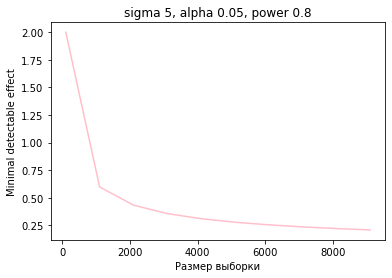

In [27]:
N_array = np.arange(100, 10000, 1000)

MDE_array = [MDE_for_t(n, sigma = 5, alpha=0.05, power =0.8) for n in N_array]


sns.lineplot(x = N_array, y=MDE_array, color = 'pink')
plt.title(f'sigma {sigma}, alpha {alpha}, power {power}')
plt.xlabel('Размер выборки')
plt.ylabel('Minimal detectable effect')
plt.show()

#  График зависимости Минимального детекриемого эффекта от размера выборки
#  С ростом выборки MDE уменьшается, но нулевого эффекта достичь не получится


В обратную сторону можно по ожидаемому эффекту вычислить необходимый размер выборки:

ДЛЯ КРИТЕРИЯ СТЬЮДЕНТА

$N =2(t_{1-\dfrac{\alpha}{2}}+t_{\beta})^{2}\dfrac{\sigma^2}{effect^2}$

In [51]:
def size_sample(N=100, alpha = 0.05, power = 0.9, variance = 10, effect = 0.5):
    S = sigma/(effect**2)
    M =  (t(N-1).ppf(q=1-alpha/2) + t(N-1).ppf(q=power))**2
    return 2*M*S

In [53]:
size_sample(N=100)

857.7243091245289

### Симуляция эффекта через АА тест

Также можно оценивать мощность на A/A тестах. 

Идея в том, что мы снова контролируем наши группы и  делаем на основе какие-то выводы

Придется симулировать эффект — в жизни эффект может быть распределён иначе.

И проверять как часто мы такой эффект действительно заметим.

Теперь мы будем знать, что группы отличаются друг от друга.

Теперь это будет скорее АВ, а АА.

И построим график зависимости зависимости частоты, когда мы зафиксировали данный эффект от величины самого эффекта …. И сделать выводы о том какая мощность у нашего подхода.

Пример.
- Пользователь заходит в стриминговый музыкальный сервис
 - В некоторых случаях они пользуются нашей подборкой новых песен
 - У каждого человека своя склонность к использованию ЭТОГО плейлиста
 - Хотим сравнить разные алгоритмы создания плейлиста
*
* Чтобы описать персональные предпочтения каждого из пользователей, мы хотим определить CTR каждого конктертного пользователя

$CTR = \dfrac{количество\spaceкликов}{количество\spaceпоказов} * 100$

In [34]:
user_num = 1000 # количество пользователе

mean_user_ctr = 0.2  # подобрали такое средне значение для CTR
beta = 20

In [35]:
#  Отделим генерацию выборки в отдельную функцию, куда будем передавать величину самого эффекта

def get_clicks(effect=0.01):
    new_mean_user_ctr = mean_user_ctr + effect
    alpha = new_mean_user_ctr*beta/(1-new_mean_user_ctr)
    user_ctr = np.random.beta(alpha, beta, size=user_num)
    views = np.random.lognormal(mean=1, sigma=1, size=user_num).astype(int)+1
    return np.random.binomial(views, user_ctr)

In [36]:
from scipy.stats import mannwhitneyu

def get_pvalue(effect):
    click_1 = get_clicks(effect=0)
    click_2 = get_clicks(effect=effect)
    
    return mannwhitneyu(click_1, click_2)

In [37]:
effects = np.arange(0, 0.07, 0.01)

power = []

for effect in effects:
    pvalues = [get_pvalue(effect=effect) for _ in range(1000)]
    power.append(np.mean(np.array(pvalues) < 0.05))

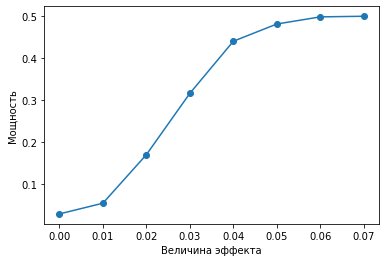

In [42]:
plt.plot(effects, power, 'o-')
plt.xlabel('Величина эффекта')
plt.ylabel('Мощность')
plt.show()

__8 урок: 11 задача___

А теперь давайте попробуем оценить мощность с помощью симуляций, похожих на A/A эксперименты.

Предположим, что мы оцениваем, сколько времени пользователи проводят при изучении нашего рекламного предложения (сколько времени проходит от открытия до закрытия веб-страницы). До запуска эксперимента мы бы хотели понимать, какую мощность нам стоит ожидать, если мы будем запускать эксперимент на неделю.

Для этого аналогично процедуре проверки системы экспериментирования в A/A экспериментах реализуйте функцию, где будете генерировать две выборки из нормального распределения (предполагаем, что время распределено нормально со средним в контрольной группе 200 секунд и среднеквадратичным отклонением 30) одинакового размера (у нас 1000 пользователей в неделю, мы разбиваем их на 2 группы).

Повторите процедуру «эксперимента» 1000-10000 раз, оцените, в каком проценте случаев мы будем детектировать изменение в метрике, если в тестовой группе среднее будет равно 205 секунд. Это и будет мощностью в нашем эксперименте. В качестве статистического критерия используйте t-критерий Стьюдента, альтернатива двусторонняя, уровень значимости 0.05.

In [54]:
# Функция, генерирующая выборки

def get_sample(effect =5):
    sample_1 = np.random.normal(loc = 200, scale = 30, size = 500)
    sample_2 = np.random.normal(loc = 200+ effect, scale = 30, size = 500) # Изменение во втророй выборке
    return sample_1, sample_2
    
from scipy.stats import ttest_ind
    
def get_pvalue():
    sample_1, sample_2 = get_sample()
    
    return ttest_ind(sample_1, sample_2,  alternative='two-sided')[1]

pvalues=[get_pvalue() for _ in range(10000)]

np.mean(np.array(pvalues) < 0.05)

0.7523

# A/B  тестирование

## Уменьшение дисперсии для увеличения мощности
Чем больше дисперсия, тем сложнее увидеть эффект

### CUPED

Нам хочется уметь детектировать эффект даже при большой дисперсии. Представим, что у нас есть 2 пользователя, у которых до эксперимента 3 и 15 прослушивания треков соответственно. Во время эксперимента стало 4 и 16 соответсвенно. Видим, что дисперсия (3 и 15, 4 и 16) заметно больше, чем эффект.

Как нам исключить особенности пользователя, а смотреть на потенциальное изменение?

Для этого был придуман метод CUPED.

Этот метод вводит новую метрику 

$Y_{cuped} =Y−θX$
, где

• Y — исходная метрика;

• X — некоторый признак пользователя, который не зависит от попадания пользователя в эксперимент;

• θ — общий параметр для всех Y.

In [4]:
# Пользл\ователь делает регулярно покупки в магазине
# У каждого пользователя разная средняя корзина и каждый
# раз есть небольшая разница между покупками

user_num = 10000

df = pd.DataFrame()
df['user'] = range(user_num)
df['group'] = np.random.rand(user_num) < 0.5

df['user_mean'] = np.random.uniform(400, 1000, size = user_num) # У каждого пользователя своя привычная коржина, с равномерным распределением по все мпользователя от 400 до 100 р

# Сгененрируем 2 выборки
df['cost_before'] = df['user_mean'] + np.random.normal(0, 50, size = user_num) # как пользователи покупали ДО эксперемента
df['cost'] = df['user_mean'] + np.random.normal(0, 50, size = user_num) # и как пользователь покупали ПОСЛЕ эксперемента

# В этой выборке не будет разницы между нашими группами пользователе
# Будет верна Нулевая гипотеза потому что мы генерируем их из одного и того же распределения

$ \theta = \dfrac{cov(Y_{before}, Y)}{\mathbb D Y_{before}}$

In [5]:
# Вычислим параметр θ (тетта)


theta = np.cov(df['cost'], df['cost_before'])[0,1]/np.var(df['cost_before']) # numpy вычисляет всю ковариационную матрицу, а не только ковариацию между двумя признаками
theta

# видим, что метрика будет близка к единице, всё потому что эти виличины очень скоррелированы

0.9239075400307404

$Y_{cuped} = Y− \theta *(Y_{before}-\mathbb E Y_{before})$

In [7]:
# Теперь вычислим новое значение метрики через старое значение метрики,
# коэффициент который мы вычислили и старое значение нашей метрики на предыдущей выборке

df['cost_cuped'] = (df['cost']- 
                    theta*(df['cost_before']- np.mean(df['cost_before'])))

# с поправкой на Мат ожидание., чтобы матожидание нашей новой метрики
# совпадало с мат ожинадине старой

In [9]:
# Можем посчитать мат ожидания.

np.mean(df[df.group==0].cost), np.mean(df[df.group==1].cost_cuped)

(698.5990291287494, 698.5279131711375)

In [11]:
# Посмотрим на дисперсии до и после

np.var(df[df.group==0].cost), np.var(df[df.group==1].cost)

(32645.212347830682, 33423.89467136127)

In [14]:
np.var(df[df.group==0].cost), np.var(df[df.group==1].cost_cuped)

# Дисперсия уменьшираль в 6 раз

(32645.212347830682, 4680.443816058713)

Еще раз 
1. Берём метрику за период до эксперемента (например, за пару недель .. если эксперемент идет тоже пару недель)
2. Вычисляем $\theta$ по формуле
$ \theta = \dfrac{cov(Y_{before}, Y)}{\mathbb D Y_{before}}$
3. Вычисляем новую метрику по форумле 
$Y_{cuped} = Y− \theta *(Y_{before}-\mathbb E Y_{before})$
4. Применяем статистический критерий на новой метрике

Итоги:
1. CUPED помогает уменьшить дисперсию на 20-30% - зависит от данных
2. Полезен для дисперсионных метрик, на менее дисперсных может давать околонулевой буст
3.  Сохраняет эффект и интерпритируемость (взыли новую метрику, которая вычищенная старая) - из-за того, что мы сохранили мат ожидание

#### Ещё один 
Попробуем применить CUPED на практике на синтетических данных (на реальных, конечно, эффект будет не таким большим).

Воспользуйтесь кодом для генерации данных:

In [15]:
users_num = 10000

df = pd.DataFrame()
df['user'] = range(users_num)
df['group'] = np.random.rand(users_num) < 0.5

df['user_mean'] = np.random.lognormal(mean=np.log(1000), sigma=0.5, size=users_num)
df['cost_before'] = np.abs(
    df['user_mean'] + np.random.normal(0, 100, size=users_num)
)
df['cost'] = np.abs(
    df['user_mean'] + np.random.normal(50, 100, size=users_num)
)

В нём мы генерируем нашу метрику «трат» для 2-х групп пользователей так, что исходная привычка распределена логнормально, а в наших периодах до и во время эксперимента с некоторым нормальным отклонением от привычки каждого пользователя. При этом в тестовом периоде люди тратят больше.

Примените к этим данным CUPED и посчитайте, во сколько раз уменьшилась дисперсия в вашей выборке.

In [16]:
# Вычислим параметр θ (тетта)


theta = np.cov(df['cost'], df['cost_before'])[0,1]/np.var(df['cost_before']) # numpy вычисляет всю ковариационную матрицу, а не только ковариацию между двумя признаками
theta

0.9780907912386562

In [17]:
df['cost_cuped'] = (df['cost']- 
                    theta*(df['cost_before']- np.mean(df['cost_before'])))

In [19]:
np.var(df[df.group==0].cost) / np.var(df[df.group==1].cost_cuped)

19.46158273122971

### Сравнение изменений числа кликов и CTR
Метод, который помогает проверять достоверность отклонений метрик в виде отношений.

ольшая часть метрик представляет собой бинарные величины — клики на баннеры, переходы на следующие экраны приложения и так далее. По сути они представляют собой CTR со значениями 0 (кликнули) и 1 (не кликнули).

Поэтому хочется сравнивать средний CTR при изменении продукта, то есть количество кликов, разделенное на количество просмотров:

$CTR=\dfrac{\sum clicks}{\sum view}$

Рассмотрим пример — зададим CTR и создадим две выборки с кликами и просмотрами.

In [33]:
user_num = 1000 # количество пользователе

mean_user_ctr = 0.2  # подобрали такое средне значение для CTR
beta = 20
alpha = mean_user_ctr*beta / (1-mean_user_ctr)

In [34]:
df = pd.DataFrame()
df['user'] = range(user_num)
df['group'] = np.random.rand(user_num) < 0.5

df['base_user_ctr'] = np.random.beta(alpha, beta, size = user_num)
df['views'] = np.random.lognormal(mean=1, sigma=1, size=user_num).astype(int)+1
df['clicks'] = np.random.binomial(df['views'], df['base_user_ctr'])


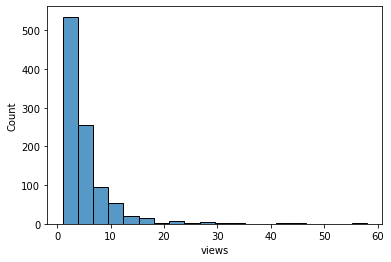

In [35]:
# посмотрим на распределение значений просмотров

sns.histplot(df.views, bins=20, palette='magma')
plt.show()

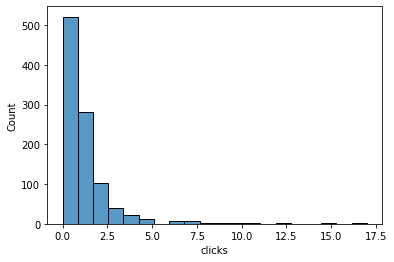

In [36]:
# А теперь посмотрим на распределение значений кликов.

sns.histplot(df.clicks, bins=20, palette='magma')
plt.show()

__*Как проанализировать успешность рекламного банера?*__

1. Так как каждый клик может принимать значение 0 или 1, можно сравнивать две группы на равенство p в распределении Бернулли  и применять z-тест. Однако, здесь нарушается независимость наблюдений — не контролируется ошибка первого рода (FPR). Таким образом, этот подход не валиден.


2. Можно сравнивать число кликов — посчитать количество единиц по всем пользователям и применить t-критерий Стьюдента (осторожно) или критерий Манна-Уитни-Уилкоксона.


3. Можно сравнивать CTR, учитывая и клики, и просмотры. Рассмотрим групповой CTR, предполагая, что мы не влияем на просмотры:



#### Бутстреп для проверки гипотез

• Формируем выборки с возвращениями пользователей в каждой из двух групп;

• Для каждой выборки подсчитываем групповой CTR;

• Оцениваем значимость;

В результате получаем бутстрэп распределения отклонений CTR-ов между собой.

  

Рассмотрим пример — сгенерируем много выборок, по каждой посчитаем CTR. Далее оценим p-value при нулевой гипотезе, что средние CTR-ы совпадают.

#### Бакетирование для проверки гипотез
• Для каждого пользователя определяем бакет (например, разбиением с другой солью на 100 групп);

• Для каждого бакета подсчитываем групповой CTR – получаем CTR-ы мета-пользователей;

• Сравниваем две выборки по 100 элементов с помощью t-критерия Стьюдента и критерия Манна-Уитни-Уилкоксона.

In [43]:
import hashlib

df['bucket'] = df['user'].apply(
    lambda x: int(hashlib.md5((str(x) + 'my_salt').encode()).hexdigest(), 16)%100)

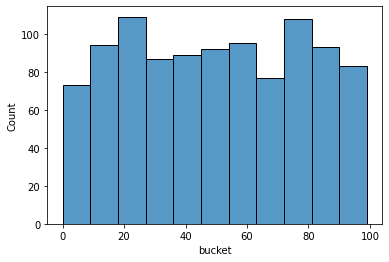

In [44]:
sns.histplot(df.bucket)
plt.show()

##### Другая задача

Давайте практиковаться в бакетном тестирование, а заодно проверим, как будет различаться дисперсия CTR в бакете, если считать её двумя способами. Сгенерируйте данные следующим кодом:

In [45]:
np.random.seed(6)

users_num = 10000
mean_user_ctr = 0.2
beta = 20
alpha = mean_user_ctr * beta / (1 - mean_user_ctr)

df = pd.DataFrame()
df['user'] = range(users_num)
df['group'] = np.random.rand(users_num) < 0.5

df['base_user_ctr'] = np.random.beta(alpha, beta, size=users_num)
df['views'] = np.random.lognormal(mean=1, sigma=1, size=users_num).astype(int) + 1
df['clicks'] = np.random.binomial(df['views'], df['base_user_ctr'])

Сделайте переход к бакетам (возьмём 100 штук), с помощью md5 кэша с солью, применённой к айдишнику пользователя (от соли результат сильно различаться не будет, но можете взять 'my_salt').

In [46]:
import hashlib

df['bucket'] = df['user'].apply(
    lambda x: int(hashlib.md5((str(x) + 'my_salt').encode()).hexdigest(), 16)%100)

# Соль не должна совпадать с солью нашего эксперемента

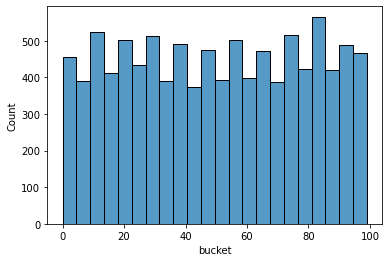

In [47]:
sns.histplot(df.bucket)
plt.show()

In [57]:
new_df = df.groupby(['group', 'bucket']).agg({'views': 'sum', 'clicks' :'sum', 'base_user_ctr' : 'mean'}).reset_index()

new_df['ctr'] = new_df.clicks/new_df.views



new_df.head()

,group,bucket,views,clicks,base_user_ctr,ctr
0,False,0,178,28,0.191009,0.157303
1,False,1,249,48,0.206134,0.192771
2,False,2,249,51,0.197792,0.204819
3,False,3,216,53,0.214350,0.245370
4,False,4,244,41,0.194958,0.168033


In [60]:
var_base_user_ctr = np.var(new_df.base_user_ctr)
var_ctr = np.var(new_df.ctr)

print(var_base_user_ctr, var_ctr)

0.00013026182030571128 0.0007497034441389309


#### Линеаризация для проверки гипотез
• Перейдём от метрик отношений к новым пользовательским линеаризованным метрикам:

$LibearizedCTR=Click−A⋅Views$

• A — подсчитаем по контрольной выборке (отношение всех показов ко всем кликам — общий глобальный CTR); - оббщий глобальный CTR  по контрольной выборке
A * Views - ожидаемое число кликов

• Применяем привычные тесты к новым выборкам.

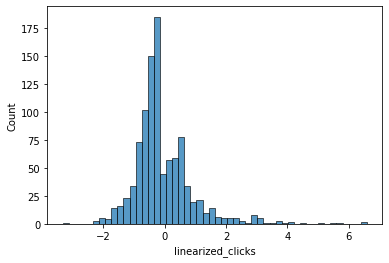

In [37]:
# Подсчитам коэффициент А

coef = df[df.group==0].clicks.sum() / df[df.group ==0].views.sum()

df['linearized_clicks'] = df.clicks -coef*df.views

sns.histplot(df['linearized_clicks'])
plt.show()

In [38]:
from scipy.stats import mannwhitneyu

mannwhitneyu(df[df.group ==0].linearized_clicks, df[df.group==1].linearized_clicks)


MannwhitneyuResult(statistic=126123.0, pvalue=0.8050606061863941)